# K Nearest Neighbor (KNN)
K-Nearest Neighbors (KNN) is a simple, yet powerful algorithm used in machine learning for both classification and regression tasks. Here's a brief overview:

### Basic Concept: 
KNN works by finding the 'k' closest data points (neighbors) in the training dataset to a new, unseen data point. The value of 'k' is a key parameter and can be determined through cross-validation.

### Classification: 
In classification tasks, KNN assigns a class to the new data point based on the majority class among its 'k' nearest neighbors. For example, if 'k' is 5, and 3 out of 5 neighbors belong to Class A and 2 belong to Class B, the algorithm would classify the new data point as Class A.

### Regression: 
In regression tasks, KNN predicts a value for the new data point based on the average (or sometimes the median) of the values of its 'k' nearest neighbors.

### Distance Metrics: 
The algorithm uses distance metrics to find the nearest neighbors. Common metrics include Euclidean, Manhattan, and Minkowski distances

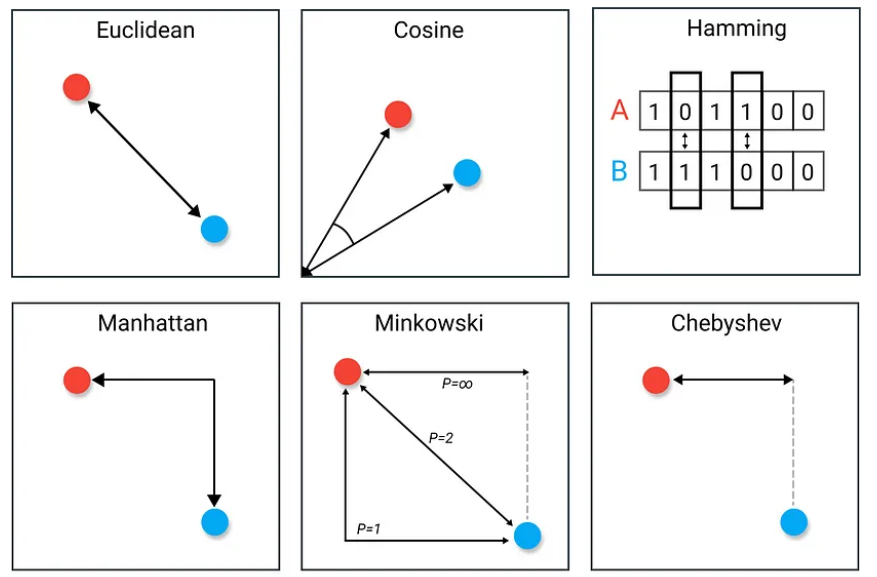

# Loading Dataset

In [1]:
from sklearn.datasets import load_diabetes

In [4]:
dataset= load_diabetes()
dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Converting dataset into dataframe.

In [6]:
df= pd.DataFrame(dataset.data, columns=dataset.feature_names) # It will create dataframe of features.
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [8]:
# Adding target into dataframe
df['Target']= dataset.target

In [9]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'bp'}>, <Axes: title={'center': 's1'}>,
        <Axes: title={'center': 's2'}>],
       [<Axes: title={'center': 's3'}>, <Axes: title={'center': 's4'}>,
        <Axes: title={'center': 's5'}>],
       [<Axes: title={'center': 's6'}>,
        <Axes: title={'center': 'Target'}>, <Axes: >]], dtype=object)

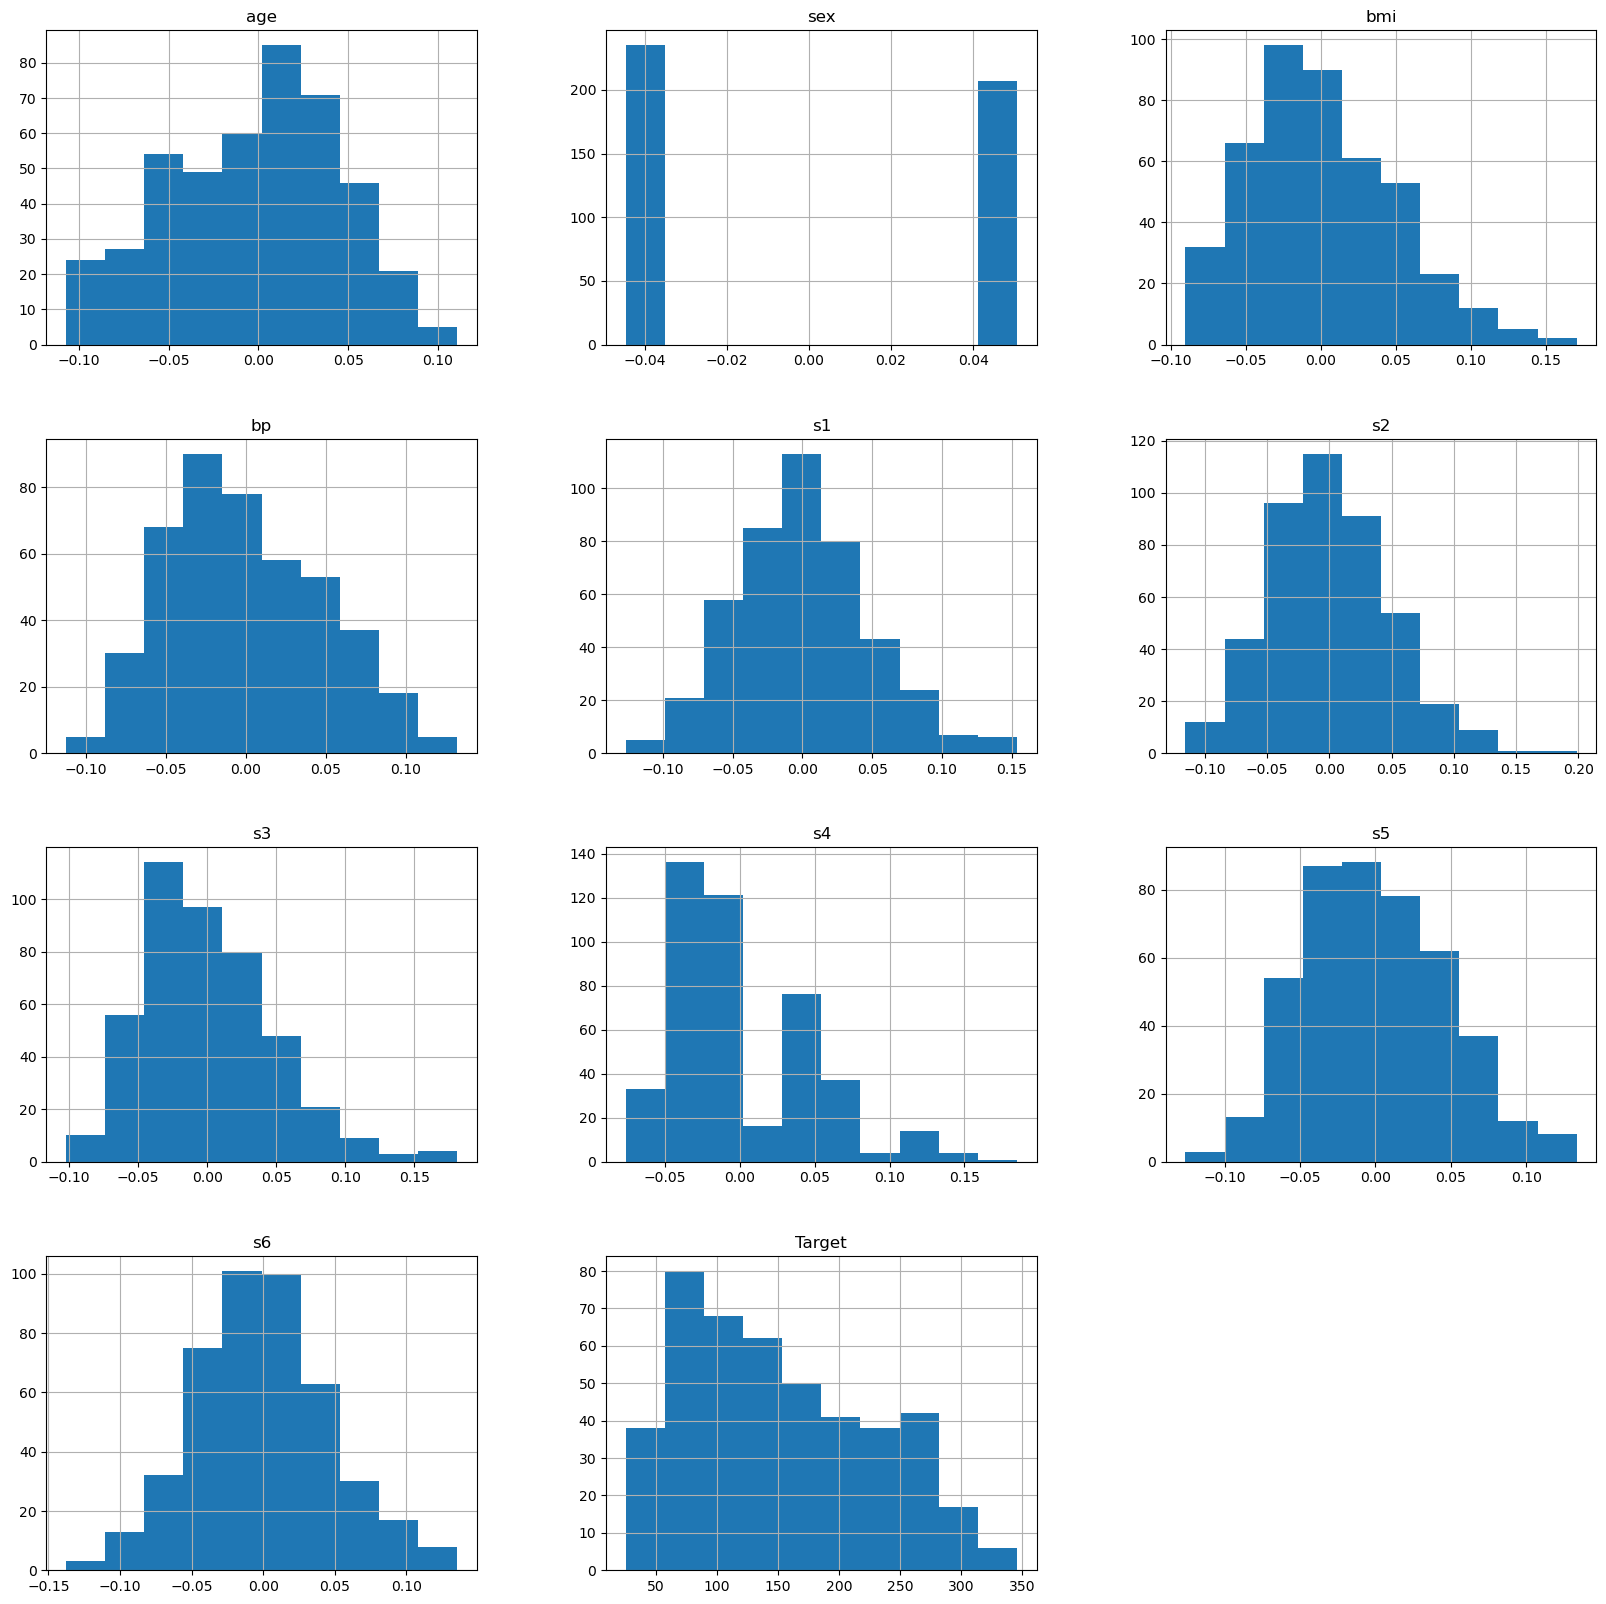

In [11]:
# Visualizing the normal distribution of all the columns
df.hist(figsize=(20,20))

### Splitting train and test data

In [12]:
from sklearn.model_selection import train_test_split

In [53]:
X= np.array(df.drop('Target', axis= 1))
y= df[['Target']]

In [54]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.15, random_state= 42)

### Importing k neighbor

In [55]:
from sklearn.neighbors import KNeighborsRegressor

In [56]:
k= 10
knn= KNeighborsRegressor(n_neighbors= k, metric= 'euclidean')

* The KNeighborsRegressor(n_neighbors=k, metric='euclidean') is a command in Python that initializes a K-Nearest Neighbors regression model, where 'k' specifies the number of nearest neighbors to consider for predicting a continuous value. 
* It uses the Euclidean distance to measure the closeness of points, making it suitable for regression tasks where predictions are based on the average of the 'k' nearest data points in the training set.

In [57]:
knn.fit(X_train, y_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=10)

In [58]:
print('knn.score(X_train, y_train)= ',knn.score(X_train, y_train))

knn.score(X_train, y_train)=  0.5234824449446432


* Using this method on the training data can provide insights into how well the model has learned from the data it was trained on. 

In [59]:
print('knn.score(X_test, y_test)= ',knn.score(X_test, y_test))

knn.score(X_test, y_test)=  0.4129474146256247


### knn.score(X_test, y_test) 
* This method evaluates the performance of the trained K-Nearest Neighbors regression model on a test dataset. 
* Here, X_test contains the test features, and y_test has the corresponding true values. 
* This method returns the coefficient of determination, also known as R² score, which measures how well the model's predictions approximate the actual data. 
* An R² score of 1 indicates perfect prediction, while a score of 0 would mean that the model performs no better than simply predicting the mean of the target variable for all observations.

# Predicting value of K with help of line plot.

In [60]:
k= range(2,12)

train_score= []
test_score= []

for i in k:
    print(f'Trying KNN for k= {i}')
    knn= KNeighborsRegressor(n_neighbors= i, metric= 'euclidean')
    knn.fit(X_train, y_train)
    
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))

Trying KNN for k= 2
Trying KNN for k= 3
Trying KNN for k= 4
Trying KNN for k= 5
Trying KNN for k= 6
Trying KNN for k= 7
Trying KNN for k= 8
Trying KNN for k= 9
Trying KNN for k= 10
Trying KNN for k= 11


In [61]:
train_score

[0.7428902023200854,
 0.6561368404302805,
 0.5996935610218126,
 0.5881736864897975,
 0.5718660201971302,
 0.5529660147248032,
 0.544131782603925,
 0.5298002288985092,
 0.5234824449446432,
 0.5200236638691916]

In [62]:
test_score

[0.3720973825612227,
 0.3241018195436832,
 0.4227984890787335,
 0.423636531348611,
 0.4543650605938673,
 0.4398266339050465,
 0.44979753012863033,
 0.4312105494363584,
 0.4129474146256247,
 0.42308474162231446]

So now we got test_score and train_score for all the values of k between 2,11. So now we will visualize it with help of line plot in order to know the best value of k.

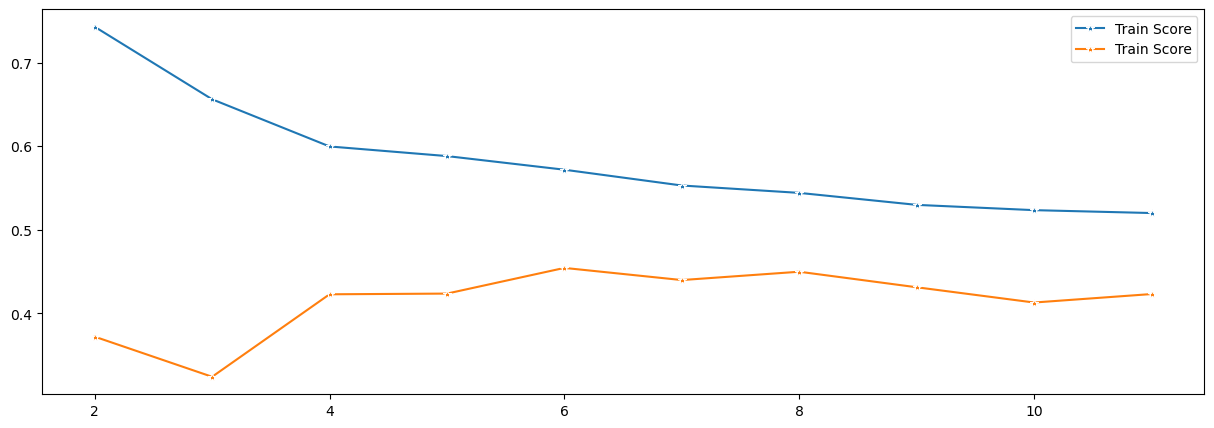

In [64]:
plt.figure(figsize= (15,5))
p= sns.lineplot(x= range(2,12) , y= train_score, marker= '*', label= 'Train Score')
p= sns.lineplot(x= range(2,12) , y= test_score, marker= '*', label= 'Train Score')

The maximum train score value is at 2 and test score is at 6, so we can select values in between 2-6 but not greater than 6.

In [65]:
k= 6
knn= KNeighborsRegressor(n_neighbors= k, metric= 'euclidean')
knn.fit(X_train, y_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=6)

In [66]:
knn.score(X_train, y_train)

0.5718660201971302

In [67]:
knn.score(X_test, y_test)

0.4543650605938673

So here we got improvement in knn score.`

# KNN for Classification dataset

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
from sklearn.datasets import load_breast_cancer

In [70]:
dataset= load_breast_cancer()

In [72]:
dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [87]:
df= pd.DataFrame(dataset.data, columns= dataset.feature_names)
df['Target']= dataset.target

In [92]:
X= np.array(df.drop('Target', axis= 1))
y= df[['Target']]

In [93]:
X_train, X_test, y_train ,y_test= train_test_split(X, y, test_size= 0.2, random_state= 42)

In [94]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [95]:
k= range(2,12)

train_score= []
test_score= []
for i in k:
    print(f'Trying KNN for k= {i} ')
    knn= KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train, y_train)
    
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))

C:\Users\abdul\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
Exception in thread Thread-7 (_readerthread):
Traceback (most recent call last):
  File "C:\Users\abdul\anaconda3\Lib\threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "C:\Users\abdul\anaconda3\Lib\threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\abdul\anaconda3\Lib\subprocess.py", line 1597, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "C:\Users\abdul\anaconda3\Lib\encodings\cp1252.py", line 23, in decode
    return codecs.charmap_decode(input,self.errors,decoding_table)[0]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 3: character maps

Trying KNN for k= 2 


C:\Users\abdul\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\abdul\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
C:\Users\abdul\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Trying KNN for k= 3 
Trying KNN for k= 4 
Trying KNN for k= 5 


C:\Users\abdul\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\abdul\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\abdul\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Trying KNN for k= 6 
Trying KNN for k= 7 
Trying KNN for k= 8 


C:\Users\abdul\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\abdul\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\abdul\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Trying KNN for k= 9 
Trying KNN for k= 10 
Trying KNN for k= 11 


C:\Users\abdul\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\abdul\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [96]:
train_score, test_score

([0.9648351648351648,
  0.9494505494505494,
  0.9494505494505494,
  0.9406593406593406,
  0.9362637362637363,
  0.9406593406593406,
  0.9384615384615385,
  0.9318681318681319,
  0.9296703296703297,
  0.9318681318681319],
 [0.9298245614035088,
  0.9298245614035088,
  0.9385964912280702,
  0.956140350877193,
  0.9649122807017544,
  0.956140350877193,
  0.956140350877193,
  0.956140350877193,
  0.9736842105263158,
  0.9824561403508771])

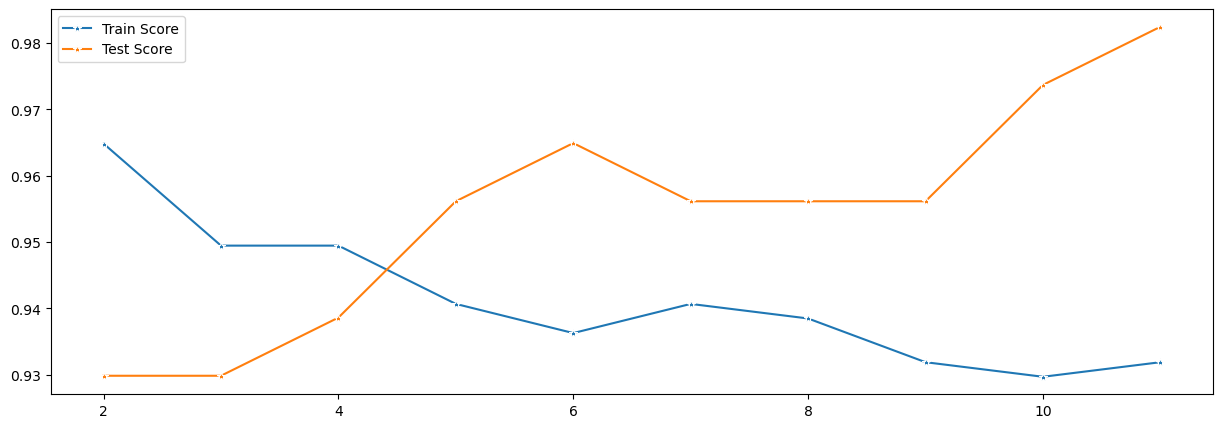

In [97]:
plt.figure(figsize=(15,5))
p= sns.lineplot(x= range(2,12), y= train_score, marker= '*', label= 'Train Score')
p= sns.lineplot(x= range(2,12), y= test_score, marker= '*', label= 'Test Score')

In [117]:
k= 5
knn= KNeighborsClassifier(n_neighbors= k)
knn.fit(X_train, y_train)

C:\Users\abdul\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [118]:
knn.score(X_train, y_train)

0.9406593406593406

In [119]:
knn.score(X_test, y_test)

0.956140350877193

# Support Vector Machine (SVM)
https://www.youtube.com/watch?v=_YPScrckx28


In [120]:
from sklearn.datasets import load_breast_cancer

In [121]:
from sklearn.svm import SVC

In [122]:
df= load_breast_cancer()

In [123]:
X= df.data
y= df.target

In [125]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 42)

In [126]:
svc= SVC(kernel= 'linear', degree= 3, C= 0.3)

### kernel='linear': 
The kernel function is a key component of SVMs; it transforms the input data into a higher-dimensional space where a hyperplane can be used to separate the classes. A linear kernel means that the separator between the classes is a line (or a hyperplane in higher dimensions). This is the simplest kernel and is used when the data is linearly separable, meaning that a straight line can separate the classes.

### degree=3: 
This parameter is typically used with polynomial kernels, not linear ones. It indicates the degree of the polynomial used to find the hyperplane. In the case of the linear kernel, this parameter will not affect the model since the kernel is not polynomial.

### C=0.3: 
This is the regularization parameter. The strength of the regularization is inversely proportional to the value of C. Regularization is a technique used to prevent overfitting by penalizing large values in the decision function. A smaller value of C leads to a wider margin of the hyperplane but allows more misclassifications (a more regularized model), while a larger value of C leads to a smaller margin and fewer misclassifications (a less regularized model). By setting C to 0.3, this model is choosing to allow more misclassifications (if beneficial for the model's ability to generalize) in order to ensure that the model is not overfitting to the training data.

In [127]:
svc.fit(X_train, y_train)

SVC(C=0.3, kernel='linear')

In [129]:
y_pred= svc.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

In [130]:
y_test

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [131]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [132]:
accuracy_score(y_test, y_pred)

0.956140350877193

In [134]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [135]:
confusion_matrix(y_test, y_pred)

array([[39,  4],
       [ 1, 70]], dtype=int64)